In [1]:
#The purpose of this test is to show that there are currently more samples for the diagnol than there are for the non diagnol parts of the matrix
#This means that the data we record will often have the weaselball stay in the same state
#I beleive this occurs because the simulator samples very quickly

In [2]:
#!/usr/bin/env python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
%load_ext version_information
%version_information numpy, pandas, matplotlib
%version_information
fig_prefix = "../figures/2018-07-22-jw-weaselball-diagnol_"
data_prefix = "../data/2018-07-22-jw-weaselball-diagnol_"


In [3]:
df = pd.read_csv('../data/2018-07-22-jw-weaselball_analysis_translation_matrix_out.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,6290,6291,6292,6293,6294,6295,6296,6297,6298,6299
0,0.222222,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.090909,0.173554,0.033058,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.060150,0.285714,0.030075,0.015038,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.070000,0.240000,0.030000,0.020000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.016949,0.050847,0.262712,0.033898,0.008475,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_import_m = pd.read_csv('../data/2018-07-22-jw-weaselball_analysis_magnitude_vector_out.csv',  header=None);
magnitude_V = df_import_m.iloc[:,0]
magnitude_V = magnitude_V.apply(pd.to_numeric)
magnitude_V = magnitude_V.astype(float)
magnitude_V.head()

0    134.0
1    144.0
2    172.0
3    136.0
4    153.0
Name: 0, dtype: float64

In [5]:
sumDiagnol = 0
sumNotDiagnol = 0

for index, row in df.iterrows():
    for i in range(row.size):
        if(index == i):
            sumDiagnol += df.iat[index,i]
        else:
            sumNotDiagnol += df.iat[index,i]

In [6]:
sumDiagnolAveraged = sumDiagnol/(df.shape[0])
sumNotDiagnolAveraged = sumNotDiagnol/(df.shape[0]**2 - df.shape[0])

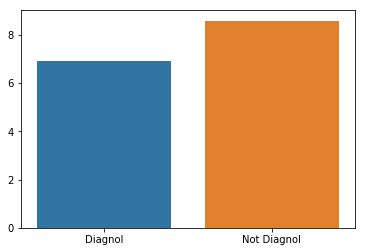

In [7]:
#This graphically shows that my hypothesis is true
#As can be seen the average "Not Diagnol" probability is orders of magnitude smaller than the average "Diagnol" probability.
data = pd.Series([sumDiagnol,sumNotDiagnol], index=['Diagnol', 'Not Diagnol'])
x = ["Diagnol","Not Diagnol"]
barplot = sns.barplot(x=x, y =np.log(data) )
plot = barplot.get_figure()
plot.savefig(fig_prefix + "diagnol_log_p.png")

In [9]:
print sumDiagnol
print sumNotDiagnol
print sumDiagnolAveraged
print sumNotDiagnolAveraged
print df.shape

991.8382253164207
5308.16177468168
0.15743463893911439
0.0001337617655279543
(6300, 6300)
